In [342]:
# Import packagaes, read in the file, show the first 3 rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import scipy.stats as stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df = pd.read_csv(r'/Users/michaelhelvajian/Documents/GitHub/Useful-Scripts/MSH_medical_data.csv',dtype={'locationid':np.int64})
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.19246,2,4,4,4,3,4,3,3


In [343]:
# Research question: 
# Is the probability of being readmitted within 1 month of release impacted by patient morbidities and demographics? 

In [344]:
# We'll start by examining the data types present in the data file and their count of non-null values.
# We'll want to look more closely at columns that contain < 10000 values.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [345]:
# Next, we'll determine if there are duplicate rows in the data set. 
# We'll do that by calling the .duplicated() method and .value_counts() method on the dataframe. 
# We want to see this evaluate to "False" and show 10000.

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [346]:
# We'll next print the unique values in specific columns calling the .unique() method.
# We'll do this to compare the categorical values to the # of unique values for the following:
# Education, Employment, Services, Complication_risk, initial_admin, marital, area, state, city
# We can examine each unique value to determine if the value makes sense or the column requires further cleaning.

print(df.Complication_risk.unique())
print(df.Children.unique())
print(df.Gender.unique())
print(df.Doc_visits.unique())
print(df.HighBlood.unique())
print(df.Stroke.unique())
print(df.Overweight.unique())
print(df.Arthritis.unique())
print(df.Diabetes.unique())
print(df.Hyperlipidemia.unique())
print(df.BackPain.unique())
print(df.Anxiety.unique())
print(df.Allergic_rhinitis.unique())
print(df.Reflux_esophagitis.unique())
print(df.Asthma.unique())

print(df.ReAdmis.unique())

['Medium' 'High' 'Low']
[ 1  3  0  7  2  4 10  5  8  6  9]
['Male' 'Female' 'Nonbinary']
[6 4 5 7 3 2 8 9 1]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [347]:
# To attribute a more specific data type to columns that have a fixed number of unique values to a category type we'll call the .astype() method. 
# We're doing this because a categorical variable takes on a limited, and usually fixed, number of possible values
# Citation https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

df['Marital'] = df['Marital'].astype('category')
df['State'] = df['State'].astype('category')
df['Area'] = df['Area'].astype('category')
df['Initial_admin'] = df['Initial_admin'].astype('category')
df['Services'] = df['Services'].astype('category')

In [348]:
# Change the values in the columns that are supposed to have Yes/No to having those values. 
# We're doing this so make these columns standardardized and allow for easier manipulation
# Citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Citation: Textbook Page 33
# Then, we replace "Yes" with 1 and "No" with 0

df['Complication_risk'] = df['Complication_risk'].replace({"Low":1,"Medium":2,"High":3})
df['Gender'] = df['Gender'].replace({"Male":1,"Female":2,"Nonbinary":3})
df['ReAdmis'] = df['ReAdmis'].replace({"Yes":1,"No":0})
df['Soft_drink'] = df['Soft_drink'].replace({"Yes":1,"No":0})
df['HighBlood'] = df['HighBlood'].replace({"Yes":1,"No":0})
df['Stroke'] = df['Stroke'].replace({"Yes":1,"No":0})
df['Overweight'] = df['Overweight'].replace({"Yes":1,"No":0})
df['Arthritis'] = df['Arthritis'].replace({"Yes":1,"No":0})
df['Diabetes'] = df['Diabetes'].replace({"Yes":1,"No":0})
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace({"Yes":1,"No":0})
df['BackPain'] = df['BackPain'].replace({"Yes":1,"No":0})
df['Anxiety'] = df['Anxiety'].replace({"Yes":1,"No":0})
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].replace({"Yes":1,"No":0})
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].replace({"Yes":1,"No":0})
df['Asthma'] = df['Asthma'].replace({"Yes":1,"No":0})
df['ReAdmis'] = df['ReAdmis'].replace({"Yes":1,"No":0})

In [349]:
print(df.Complication_risk.unique())
print(df.Children.unique())
print(df.Gender.unique())
print(df.Doc_visits.unique())
print(df.HighBlood.unique())
print(df.Stroke.unique())
print(df.Overweight.unique())
print(df.Arthritis.unique())
print(df.Diabetes.unique())
print(df.Hyperlipidemia.unique())
print(df.BackPain.unique())
print(df.Anxiety.unique())
print(df.Allergic_rhinitis.unique())
print(df.Reflux_esophagitis.unique())
print(df.Asthma.unique())

[2 3 1]
[ 1  3  0  7  2  4 10  5  8  6  9]
[1 2 3]
[6 4 5 7 3 2 8 9 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]


In [350]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CaseOrder           10000 non-null  int64   
 1   Customer_id         10000 non-null  object  
 2   Interaction         10000 non-null  object  
 3   UID                 10000 non-null  object  
 4   City                10000 non-null  object  
 5   State               10000 non-null  category
 6   County              10000 non-null  object  
 7   Zip                 10000 non-null  int64   
 8   Lat                 10000 non-null  float64 
 9   Lng                 10000 non-null  float64 
 10  Population          10000 non-null  int64   
 11  Area                10000 non-null  category
 12  TimeZone            10000 non-null  object  
 13  Job                 10000 non-null  object  
 14  Children            10000 non-null  int64   
 15  Age                 10000 non-null  i

In [351]:
# Visualize the medical conditions (11) and Children, Age, Income, Doc Visits (continuous), Gender and Complication Risk (categorical) independent variables. 

<AxesSubplot:title={'center':'High Blood Categorical Distribution'}, ylabel='Count of Rows'>

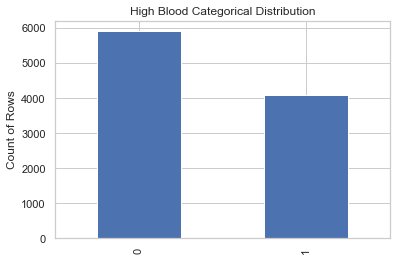

In [352]:
# Distribution of categorical variable 1 "HighBlood" using univariate statistics.

df.HighBlood.value_counts().plot(kind='bar', title='High Blood Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Stroke Categorical Distribution'}, ylabel='Count of Rows'>

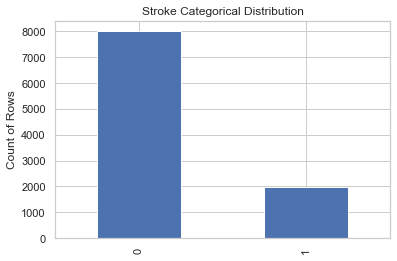

In [353]:
# Distribution of categorical variable 1 "Stroke" using univariate statistics.

df.Stroke.value_counts().plot(kind='bar', title='Stroke Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Overweight Categorical Distribution'}, ylabel='Count of Rows'>

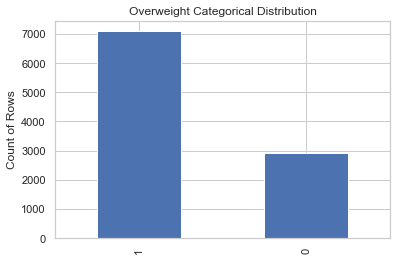

In [354]:
# Distribution of categorical variable 1 "Overweight" using univariate statistics.

df.Overweight.value_counts().plot(kind='bar', title='Overweight Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Arthritis Categorical Distribution'}, ylabel='Count of Rows'>

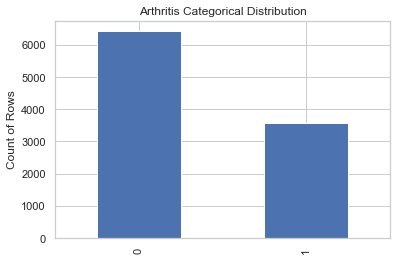

In [355]:
# Distribution of categorical variable 1 "Arthritis" using univariate statistics.

df.Arthritis.value_counts().plot(kind='bar', title='Arthritis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Diabetes Categorical Distribution'}, ylabel='Count of Rows'>

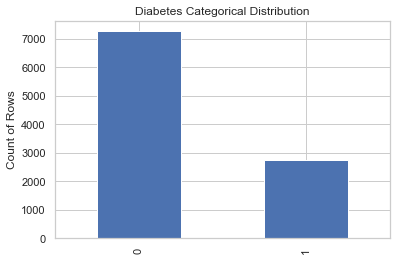

In [356]:
# Distribution of categorical variable 1 "Diabetes" using univariate statistics.

df.Diabetes.value_counts().plot(kind='bar', title='Diabetes Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Hyperlipidemia Categorical Distribution'}, ylabel='Count of Rows'>

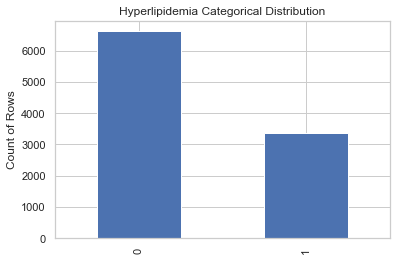

In [357]:
# Distribution of categorical variable 1 "Hyperlipidemia" using univariate statistics.

df.Hyperlipidemia.value_counts().plot(kind='bar', title='Hyperlipidemia Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'BackPain Categorical Distribution'}, ylabel='Count of Rows'>

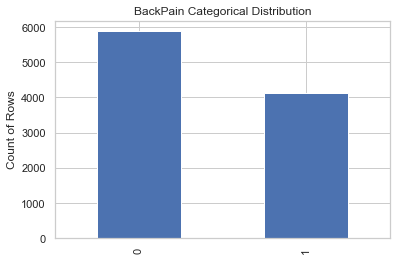

In [358]:
# Distribution of categorical variable 1 "BackPain" using univariate statistics.

df.BackPain.value_counts().plot(kind='bar', title='BackPain Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Anxiety Categorical Distribution'}, ylabel='Count of Rows'>

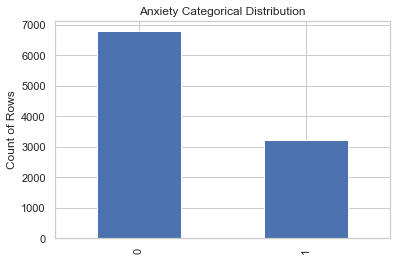

In [359]:
# Distribution of categorical variable 1 "Anxiety" using univariate statistics.

df.Anxiety.value_counts().plot(kind='bar', title='Anxiety Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Allergic Rhinitis Categorical Distribution'}, ylabel='Count of Rows'>

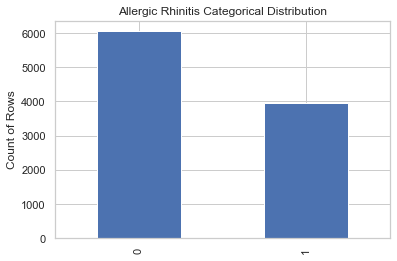

In [360]:
# Distribution of categorical variable 1 "Allergic_rhinitis" using univariate statistics.

df.Allergic_rhinitis.value_counts().plot(kind='bar', title='Allergic Rhinitis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Reflux Esophagitis Categorical Distribution'}, ylabel='Count of Rows'>

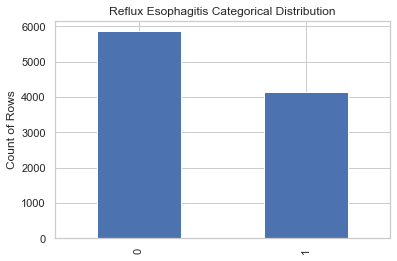

In [361]:
# Distribution of categorical variable 1 "Reflux_esophagitis" using univariate statistics.

df.Reflux_esophagitis.value_counts().plot(kind='bar', title='Reflux Esophagitis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Asthma Categorical Distribution'}, ylabel='Count of Rows'>

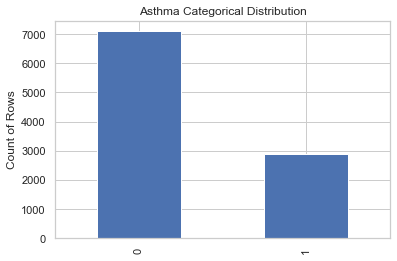

In [362]:
# Distribution of categorical variable 1 "Asthma" using univariate statistics.

df.Asthma.value_counts().plot(kind='bar', title='Asthma Categorical Distribution', ylabel='Count of Rows')

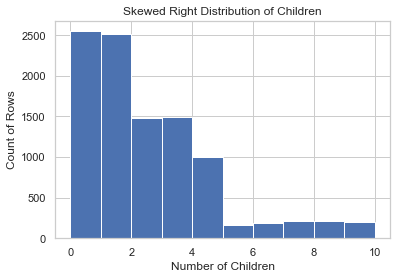

In [363]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Children'])
plt.xlabel("Number of Children")
plt.ylabel("Count of Rows")
plt.title('Skewed Right Distribution of Children')
plt.show()

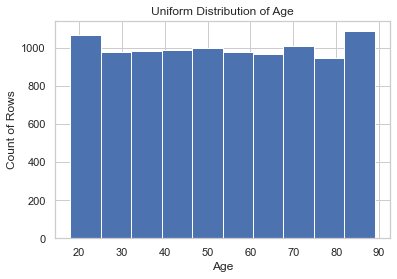

In [364]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Count of Rows")
plt.title('Uniform Distribution of Age')
plt.show()

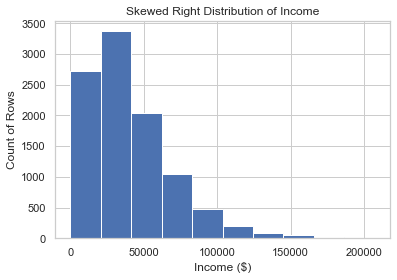

In [365]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Income'])
plt.xlabel("Income ($)")
plt.ylabel("Count of Rows")
plt.title('Skewed Right Distribution of Income')
plt.show()

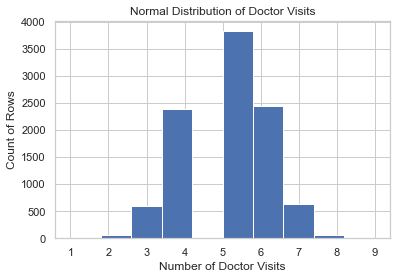

In [366]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Doc_visits'])
plt.xlabel("Number of Doctor Visits")
plt.ylabel("Count of Rows")
plt.title('Normal Distribution of Doctor Visits')
plt.show()

<AxesSubplot:title={'center':'Gender Categorical Distribution'}, ylabel='Count of Rows'>

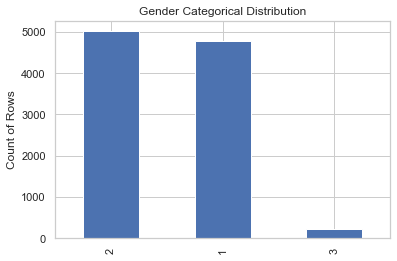

In [367]:
# Distribution of categorical variable 1 "Gender" using univariate statistics.

df.Gender.value_counts().plot(kind='bar', title='Gender Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Complication Risk Categorical Distribution'}, ylabel='Count of Rows'>

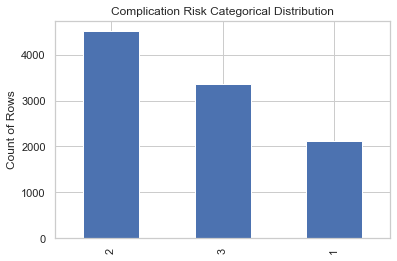

In [368]:
# Distribution of categorical variable "Complication_risk" using univariate statistics.

df.Complication_risk.value_counts().plot(kind='bar', title='Complication Risk Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Reasmission Categorical Distribution'}, ylabel='Count of Rows'>

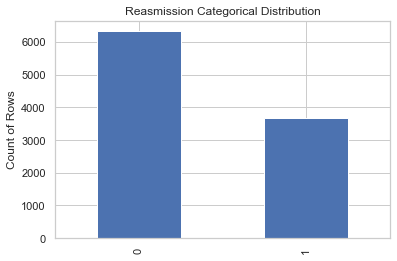

In [369]:
# Distribution of categorical variable "Complication_risk" using univariate statistics.

df.ReAdmis.value_counts().plot(kind='bar', title='Reasmission Categorical Distribution', ylabel='Count of Rows')

In [370]:
# Describing the values of "Additional_charges" to find the count, mean, and standard deviation.
df['ReAdmis'].describe()

count    10000.000000
mean         0.366900
std          0.481983
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ReAdmis, dtype: float64

In [371]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Gender,ReAdmis,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,1.544600,0.366900,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,0.539296,0.481983,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,1.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,2.000000,0.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,2.000000,1.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,3.000000,1.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [372]:
# Identifying outlier for Additional_charges to see if our distribution can be less skewed by removing outliers. 
# There are no outliers. 
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
Additional_charges_Outliers = df.Z_Score_Additional_charges.loc[(df['Z_Score_Additional_charges'] > 3.0) | (df['Z_Score_Additional_charges'] < -3.0)]
print(len(Additional_charges_Outliers))

0


In [373]:
# Identifying outlier for Children to see if our distribution can be less skewed by removing outliers. 
# There are 202 outliers.
df['Z_Score_Children'] = stats.zscore(df['Children'])
Children_Outliers = df.Z_Score_Children.loc[(df['Z_Score_Children'] > 3.0) | (df['Z_Score_Children'] < -3.0)]
print(len(Children_Outliers))

202


In [374]:
# Identifying outlier for Age to see if our distribution can be less skewed by removing outliers. 
# There are no outliers.
df['Z_Score_Age'] = stats.zscore(df['Age'])
Age_Outliers = df.Z_Score_Age.loc[(df['Z_Score_Age'] > 3.0) | (df['Z_Score_Age'] < -3.0)]
print(len(Age_Outliers))

0


In [375]:
# Identifying outlier for Income to see if our distribution can be less skewed by removing outliers. 
# There are 143 outliers.
df['Z_Score_Income'] = stats.zscore(df['Income'])
Income_Outliers = df.Z_Score_Income.loc[(df['Z_Score_Income'] > 3.0) | (df['Z_Score_Income'] < -3.0)]
print(len(Income_Outliers))

143


In [376]:
# Identifying outlier for Doc_visits to see if our distribution can be less skewed by removing outliers. 
# There are 8 outliers.
df['Z_Score_Doc_visits'] = stats.zscore(df['Doc_visits'])
Doc_visits_Outliers = df.Z_Score_Doc_visits.loc[(df['Z_Score_Doc_visits'] > 3.0) | (df['Z_Score_Doc_visits'] < -3.0)]
print(len(Doc_visits_Outliers))

8


[Text(0.5, 1.0, 'High Blood by ReAdmis')]

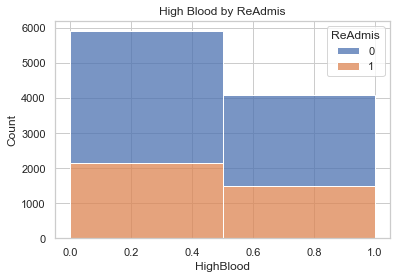

In [377]:
# Distribution of categorical variable "HighBlood" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=.5, x="HighBlood", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='High Blood by ReAdmis')

[Text(0.5, 1.0, 'Stroke by ReAdmis')]

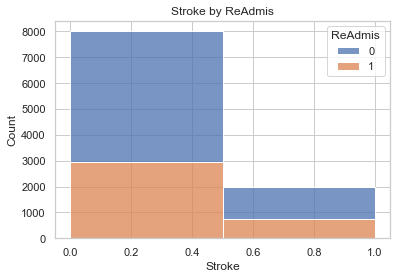

In [378]:
# Distribution of categorical variable "Stroke" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Stroke", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Stroke by ReAdmis')

[Text(0.5, 1.0, 'Overweight by ReAdmis')]

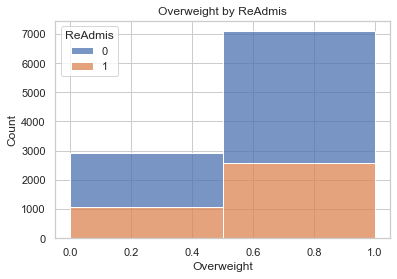

In [379]:
# Distribution of categorical variable "Overweight" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Overweight", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Overweight by ReAdmis')

[Text(0.5, 1.0, 'Arthritis by ReAdmis')]

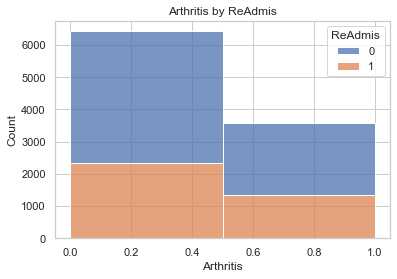

In [380]:
# Distribution of categorical variable "Arthritis" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Arthritis", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Arthritis by ReAdmis')

[Text(0.5, 1.0, 'Diabetes by ReAdmis')]

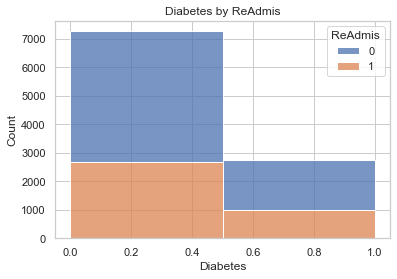

In [381]:
# Distribution of categorical variable "Diabetes" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Diabetes", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Diabetes by ReAdmis')

[Text(0.5, 1.0, 'Hyperlipidemia by ReAdmis')]

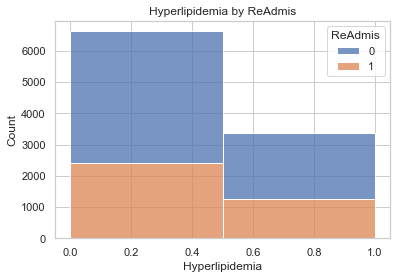

In [382]:
# Distribution of categorical variable "Hyperlipidemia" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Hyperlipidemia", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Hyperlipidemia by ReAdmis')

[Text(0.5, 1.0, 'BackPain by ReAdmis')]

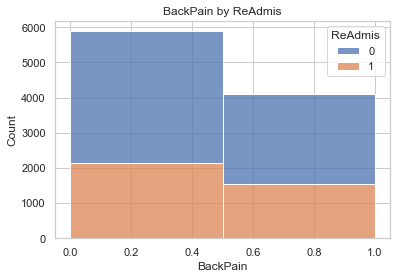

In [383]:
# Distribution of categorical variable "BackPain" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="BackPain", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='BackPain by ReAdmis')

[Text(0.5, 1.0, 'Anxiety by ReAdmis')]

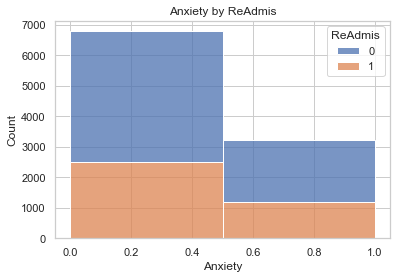

In [384]:
# Distribution of categorical variable "Anxiety" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Anxiety", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Anxiety by ReAdmis')

[Text(0.5, 1.0, 'Allergic_rhinitis by ReAdmis')]

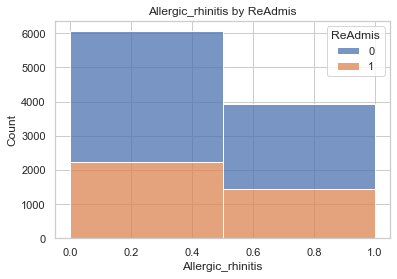

In [385]:
# Distribution of categorical variable "Allergic_rhinitis" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Allergic_rhinitis", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Allergic_rhinitis by ReAdmis')

[Text(0.5, 1.0, 'Reflux_esophagitis by ReAdmis')]

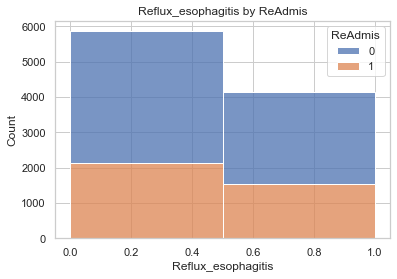

In [386]:
# Distribution of categorical variable "Reflux_esophagitis" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Reflux_esophagitis", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Reflux_esophagitis by ReAdmis')

[Text(0.5, 1.0, 'Asthma by ReAdmis')]

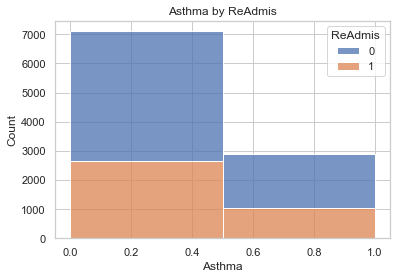

In [387]:
# Distribution of categorical variable "Asthma" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=0.5, x="Asthma", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Asthma by ReAdmis')

[Text(0.5, 1.0, 'Gender by ReAdmis')]

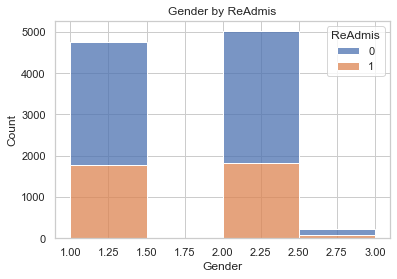

In [388]:
# Distribution of categorical variable "Gender" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=.5, x="Gender", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Gender by ReAdmis')

[Text(0.5, 1.0, 'Complication_risk by ReAdmis')]

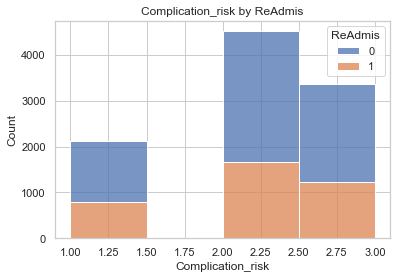

In [389]:
# Distribution of categorical variable "Complication_risk" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=.5, x="Complication_risk", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Complication_risk by ReAdmis')

[Text(0.5, 1.0, 'Children by ReAdmis')]

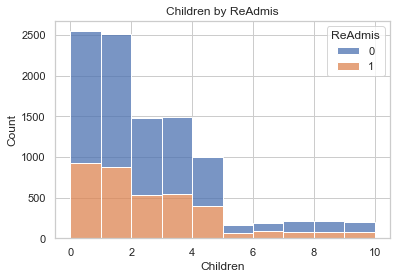

In [390]:
# Distribution of continuous variable "Children" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=1, x="Children", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Children by ReAdmis')

[Text(0.5, 1.0, 'Age by ReAdmis')]

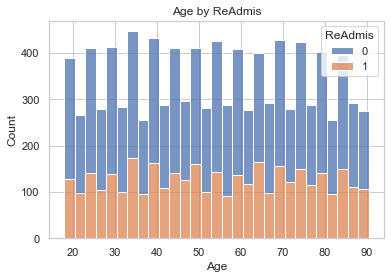

In [391]:
# Visualization of continuous variable "Age" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=2.5, x="Age", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Age by ReAdmis')

[Text(0.5, 1.0, 'Income by ReAdmis')]

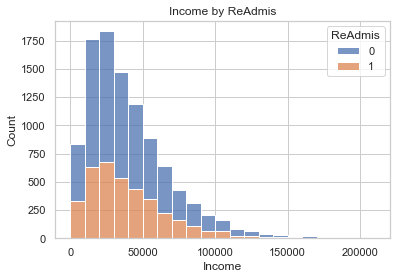

In [392]:
# Visualization of continuou variables "Income" and categorical variable "ReAdmis" using bivariate statistics.
#df.plot.scatter(x='Income', y='Additional_charges', marker='o', figsize=(7,5))
sns.histplot(binwidth=10000, x="Income", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Income by ReAdmis')

[Text(0.5, 1.0, 'Doc_visits by ReAdmis')]

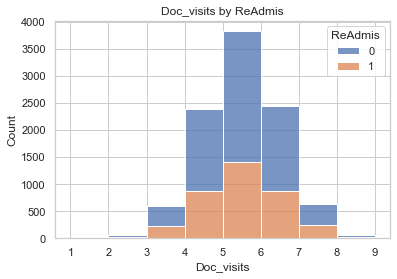

In [393]:
# Distribution of continuous variable "Doc_visits" and categorical variable "ReAdmis" using bivariate statistics.
sns.histplot(binwidth=1, x="Doc_visits", hue="ReAdmis", data=df, stat="count", multiple="stack").set(title='Doc_visits by ReAdmis')

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  category
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  category
 12  TimeZone                    10000 non-null  object  
 13  Job              

In [396]:
# Perform a simple linear regression to find the model intercept and coefficients.

Xreg = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income','Doc_visits']] # Continuous variables

yreg = df[['ReAdmis']]

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(Xreg, yreg)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [0.36023428]
Coefficients: [[ 2.38502148e-03  1.06216278e-03 -8.73219875e-03  7.43307622e-03
  -3.68187635e-03  4.34368243e-03  1.34371628e-02  2.23802371e-03
  -4.31252753e-03  5.25973186e-03 -1.83476112e-02 -7.15207315e-03
  -2.18404044e-03  5.21893076e-03  3.60432830e-04 -1.99720069e-07
   1.36422599e-04]]


In [397]:
# Finding the variance inflation factor to check for multicollinerarity 
# https://www.statisticshowto.com/variance-inflation-factor/

# These are the independent variables for a 1st test fit.
X1 = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income',  # Continuous variables
        'Doc_visits' # Potential problem variable...
        ]] 

# This is the depenent variable
y = df[['ReAdmis']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X1.values, i)
                  for i in range(len(X1.columns))]

print(vif_data)

               Feature        VIF
0            HighBlood   1.682371
1               Stroke   1.245149
2           Overweight   3.303026
3            Arthritis   1.542496
4             Diabetes   1.372085
5       Hyperlipidemia   1.490253
6             BackPain   1.688723
7              Anxiety   1.464159
8    Allergic_rhinitis   1.634460
9   Reflux_esophagitis   1.685792
10              Asthma   1.397796
11              Gender   7.971852
12   Complication_risk   8.111149
13            Children   1.912587
14                 Age   6.895140
15              Income   2.916116
16          Doc_visits  14.638405


In [398]:
# Finding the variance inflation factor to check for multicollinerarity 
# https://www.statisticshowto.com/variance-inflation-factor/

# These are the independent variables for a 1st test fit.
X2 = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income',  # Continuous variables
        #'Doc_visits' # Potential problem variable.
        ]] 

# This is the depenent variable
y = df[['ReAdmis']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X2.values, i)
                  for i in range(len(X2.columns))]

print(vif_data)

               Feature       VIF
0            HighBlood  1.671576
1               Stroke  1.242316
2           Overweight  3.191475
3            Arthritis  1.532191
4             Diabetes  1.364036
5       Hyperlipidemia  1.484766
6             BackPain  1.676400
7              Anxiety  1.457327
8    Allergic_rhinitis  1.622306
9   Reflux_esophagitis  1.673681
10              Asthma  1.394525
11              Gender  7.140638
12   Complication_risk  7.148613
13            Children  1.894633
14                 Age  6.316970
15              Income  2.832163


<AxesSubplot:>

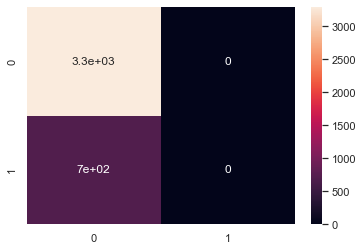

In [399]:
# Display a heatmap of the initial model. 
# Take the initial model's X2 and y and define a new data frame "dfinitial"
initial = [X2,y]
dfinitial = pd.concat(initial)
dfinitial.fillna(0, inplace=True)
dfinitial.astype('int64')

Xinitial = dfinitial.iloc[:, 1:-1].values
yinitial = dfinitial.iloc[:, -1].values

# Split the prepared data set using "Xsplit" and "ysplit"
X_train, X_test, y_train, y_test = train_test_split(Xinitial, yinitial, test_size=0.2, random_state=1)

# Create an instance of the object for LogisticRegression
logmodelinitial = LogisticRegression()
logmodelinitial.fit(X_train, y_train)

# Predict the test set results.
y_pred = logmodelinitial.predict(X_test)

# Evaluate the model using a confusion matrix. 
cminitial = confusion_matrix(y_test,y_pred)
sns.heatmap(cminitial, annot=True)

In [400]:
print(cminitial)

[[3296    0]
 [ 704    0]]


In [401]:
#The Confusion Matrix created has four different quadrants:
#TN (Top-Left Quadrant)
#FP (Top-Right Quadrant)
#FN (Bottom-Left Quadrant)
#TP (Bottom-Right Quadrant)
# Accuracy = (TP+TN)/(TP+TN+FP+FN)

Accuracyinitial = (0+3296)/(0+3296+0+704)
print(Accuracyinitial)

0.824


In [402]:
# with statsmodels show the Logit regression results for the initial model. 
#X2 = sm.add_constant(X2) # adding a constant
 
logit_model = sm.Logit(y, X2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.657537
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:              -0.0003836
Time:                        14:07:04   Log-Likelihood:                -6575.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
HighBlood             -0.0129      0.042     -0.308      0.758      -0.095       0.069
Strok

In [403]:
# Starting to reject P-values.
# https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/

# These are the independent variables for a 1st test fit.
X3 = df[[#'HighBlood', # P-value = 0.807. Remove this to see if the R-values increase.
         #'Stroke', # P-value = 0.930. Remove this to see if the R-values increase.
         'Overweight',# P-value = 0.411. Remove this to see if the R-values increase.
         #'Arthritis', # P-value = 0.460. Remove this to see if the R-values increase.
         #'Diabetes', # P-value = 0.733. Remove this to see if the R-values increase.
         #'Hyperlipidemia', # P-value = 0.341. Remove this to see if the R-values increase.
         #'BackPain', # P-value = 0.170. Remove this to see if the R-values increase.
         #'Anxiety', # P-value = 0.829. Remove this to see if the R-values increase.
         #'Allergic_rhinitis', # P-value = 0.437. Remove this to see if the R-values increase.
         #'Reflux_esophagitis', # P-value = 0.537. Remove this to see if the R-values increase.
         'Asthma', # P-value = 0.084. Remove this to see if the R-values increase.
         'Gender', # P-value = 0.424. Remove this to see if the R-values increase.
         'Complication_risk', # P-value = 0.741. Remove this to see if the R-values increase.
         #'Children', # P-value = 0.019. Remove this to see if the R-values increase.
         #'Age', # P-value = 0.123. Remove this to see if the R-values increase.
         'Income' # P-value = 0.904. Remove this to see if the R-values increase.
        #'Doc_visits' #Removed
        ]] 

# This is the depenent variable
y = df[['ReAdmis']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X3.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X3.values, i)
                  for i in range(len(X3.columns))]

print(vif_data)

             Feature       VIF
0         Overweight  3.065191
1             Asthma  1.381797
2             Gender  5.882122
3  Complication_risk  5.910189
4             Income  2.733997


In [404]:
# with statsmodels show the Logit regression results for the initial model. 
logit_model = sm.Logit(y, X3).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.657817
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:              -0.0008092
Time:                        14:07:35   Log-Likelihood:                -6578.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Overweight           -0.0996      0.043     -2.322      0.020      -0.184      -0.016
Asthma  

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  category
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  category
 12  TimeZone                    10000 non-null  object  
 13  Job              

In [406]:
# Starting to create a confusion matrix by explicitly using columns. 
dflog = pd.read_csv(r'/Users/michaelhelvajian/Documents/WGU/D208/MSH_Prepared_Data_CM.csv',dtype={'locationid':np.int64})

X = dflog.iloc[:, 1:-1].values
y = dflog.iloc[:, -1].values

In [407]:
# Split the prepared data set using "Xsplit" and "ysplit"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [408]:
# Create an instance of the object for LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [409]:
# Predict the test set results.
y_pred = logmodel.predict(X_test)

<AxesSubplot:>

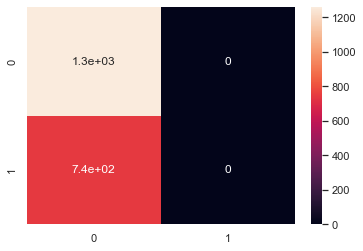

In [410]:
# Evaluate the model using a confusion matrix. 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [411]:
print(cm)

[[1261    0]
 [ 739    0]]


In [412]:
#The Confusion Matrix created has four different quadrants:
#TN (Top-Left Quadrant)
#FP (Top-Right Quadrant)
#FN (Bottom-Left Quadrant)
#TP (Bottom-Right Quadrant)

Accuracy = (0+1261)/(0+1261+0+739)
print(Accuracy)

0.6305


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  category
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  category
 12  TimeZone                    10000 non-null  object  
 13  Job              